In [26]:
import json
import folium
from folium import plugins
import pandas as pd
from time import ctime
import os

In [6]:
with open('../.data/takeout-20190506T143207Z-001/takeout/Location History/Location History.json') as something:
        json_data = json.load(something)
        df = pd.DataFrame(json_data['locations'])

In [20]:
df.head()

,accuracy,activity,altitude,heading,latitudeE7,longitudeE7,timestampMs,velocity,verticalAccuracy
0,33,NaN,NaN,NaN,252653621,514118503,1473440682388,NaN,NaN
1,33,NaN,NaN,NaN,252653617,514118507,1473440705922,NaN,NaN
2,32,NaN,NaN,NaN,252653101,514118400,1473440746158,NaN,NaN
3,32,NaN,NaN,NaN,252653070,514118392,1473440767208,NaN,NaN
4,32,"[{'timestampMs': '1473440787122', 'activity': ...",NaN,NaN,252653104,514118352,1473440787301,NaN,NaN


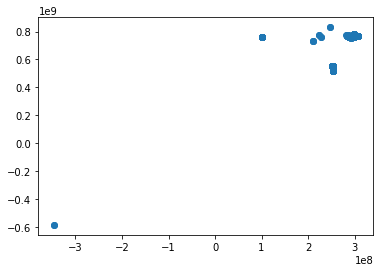

In [24]:
import matplotlib.pyplot as plt
plt.scatter([int(i) for i in df['latitudeE7']],[int(i) for i in df['longitudeE7']])

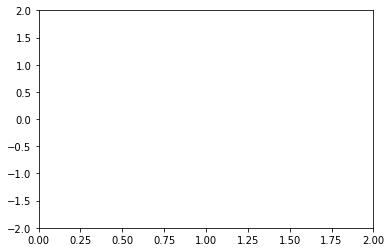

In [36]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
           frames=200, interval=20, blit=True)

plt.show()

In [34]:
m = folium.Map(
    location=[252653621/10000000, 514118503/10000000],
    zoom_start=16
)

# Lon, Lat order.
lines = [
    {
        'coordinates': [
            [252653621/10000000, 514118503/10000000],
            [202653621/10000000, 514118503/10000000],
        ],
        'dates': [
            '2017-06-02T00:00:00',
            '2017-06-02T00:10:00'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [252653621/10000000, 514118503/10000000],
            [139.7575843334198, 35.679505030038506],
        ],
        'dates': [
            '2017-06-02T00:10:00',
            '2017-06-02T00:20:00'
        ],
        'color': 'blue'
    },
    {
        'coordinates': [
            [139.7575843334198, 35.679505030038506],
            [139.76337790489197, 35.678040905014065],
        ],
        'dates': [
            '2017-06-02T00:20:00',
            '2017-06-02T00:30:00'
        ],
        'color': 'green',
        'weight': 15,
    },
    {
        'coordinates': [
            [139.76337790489197, 35.678040905014065],
            [139.56451516151428, 35.68159659061569],
        ],
        'dates': [
            '2017-06-02T00:30:00',
            '2017-06-02T00:40:00'
        ],
        'color': '#FFFFFF',
    },
]

features = [
    {
        'type': 'Feature',
        'geometry': {
            'type': 'LineString',
            'coordinates': line['coordinates'],
        },
        'properties': {
            'times': line['dates'],
            'style': {
                'color': line['color'],
                'weight': line['weight'] if 'weight' in line else 5
            }
        }
    }
    for line in lines
]

plugins.TimestampedGeoJson({
    'type': 'FeatureCollection',
    'features': features,
}, period='PT1M', add_last_point=True).add_to(m)

m.save('Plugins_6.html')
m


In [19]:
# ctime(int(1473440682388))

OSError: [Errno 22] Invalid argument